In [67]:
using OrdinaryDiffEq, DiffEqSensitivity
using ParameterizedFunctions
using ForwardDiff
using Plots

In [73]:
function f(du,u,p,t)
  du[1] = dx = p[1]*u[1] - p[2]*u[1]*u[2]
  du[2] = dy = -p[3]*u[2] + u[1]*u[2]
end

p = [1.5,1.0,3.0]
prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

heaviside (generic function with 1 method)

In [91]:
function heaviside(x::AbstractVector{T}) where T
    ifelse.(x < 0, zero(x), ifelse(x > 0, one(x), oftype(x,0.5)))
end

model = @ode_def_all begin
  dx = a*x - b*heaviside(x)*x*y
  dy = -c*y + x*y
end a b c

p = (a=1.5,b=1.0,c=3.0)
prob = ODEProblem(model,[1.0;1.0],(0.0,10.0),p)

┌ Warning: Jacobian construction failed
└ @ ParameterizedFunctions /home/shigoto/.julia/packages/ParameterizedFunctions/sBrWK/src/ode_def_opts.jl:63
┌ Warning: W-expression construction failed
└ @ ParameterizedFunctions /home/shigoto/.julia/packages/ParameterizedFunctions/sBrWK/src/ode_def_opts.jl:76


ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [75]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 34-element Array{Float64,1}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821776882875
  0.9444045910389707
  1.2674601253261835
  1.6192913723304114
  1.9869755337814992
  2.264090367186479
  2.5125486490278424
  2.746828248824617
  3.038006827022277
  ⋮
  6.455761908474447
  6.780495751224447
  7.171039674548505
  7.584862904164952
  7.978068388305894
  8.483164907244102
  8.719247868929038
  8.949206527971544
  9.200184813643565
  9.438028630962807
  9.711807852444823
 10.0
u: 34-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.8767193485546056, 0.32473343696185236]
 [2.5882499852859384, 0.26336255804531]
 [3.860708771268753, 0.2794458027885767]
 [5.750812903389158, 0.5220073140479389]
 [6.814978737433837, 1.917783300239219]
 [4.3929977807914105, 4.

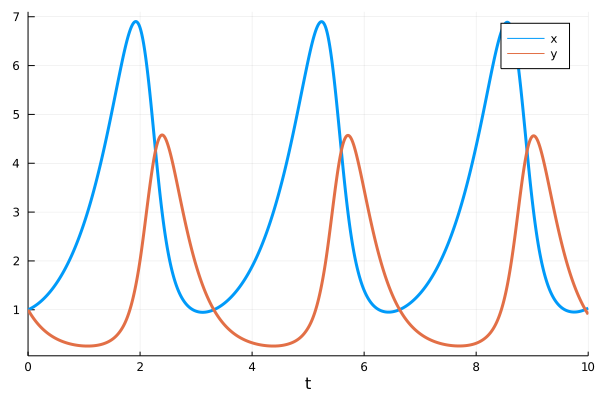

In [76]:
plot(sol, lw=3)

In [77]:
function sol_pars(p)
    prob = ODEProblem(f,[1.0;1.0],(0.0,10.0),p)
    solve(prob, Tsit5())
end

sol_pars (generic function with 1 method)

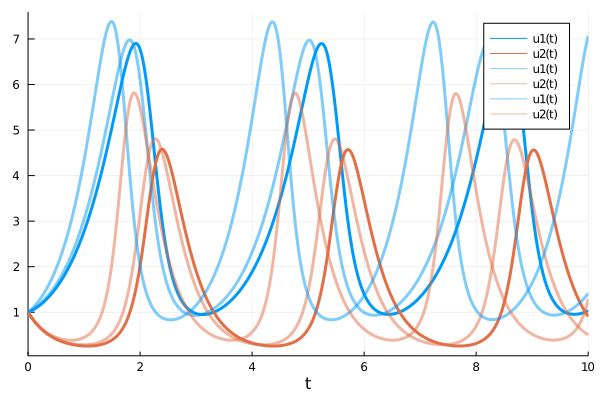

In [80]:
p = [1.5,1.0,3.0]
sol = sol_pars(collect(p))
plot(sol, vars=1, lw=3, color=1)
plot!(sol, vars=2, lw=3, color=2)
sol = sol_pars(p+1e-1(1:3 .== 1))
plot!(sol, vars=1, lw=3, alpha=0.5, color=1)
plot!(sol, vars=2, lw=3, alpha=0.5, color=2)
sol = sol_pars(p+5e-1(1:3 .== 1))
plot!(sol, vars=1, lw=3, alpha=0.5, color=1)
plot!(sol, vars=2, lw=3, alpha=0.5, color=2)

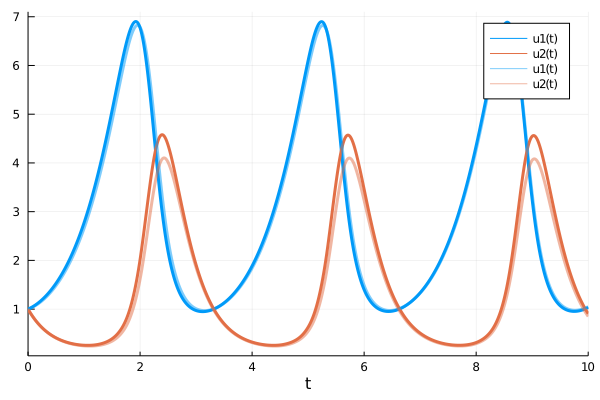

In [81]:
p = [1.5,1.0,3.0]
sol = sol_pars(p)
plot(sol, vars=1, lw=3, color=1)
plot!(sol, vars=2, lw=3, color=2)
sol = sol_pars(p+1e-1(1:3 .== 2))
plot!(sol, vars=1, lw=3, alpha=0.5, color=1)
plot!(sol, vars=2, lw=3, alpha=0.5, color=2)

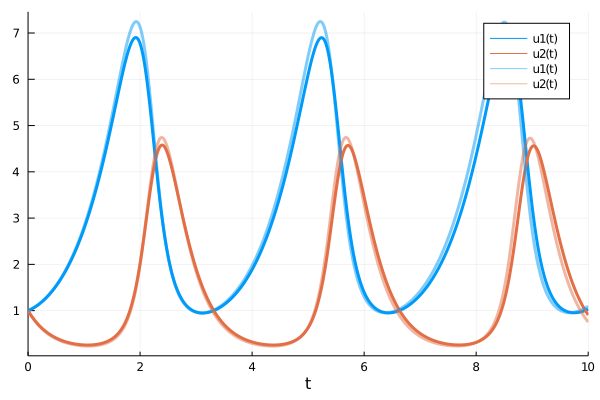

In [82]:
p = [1.5,1.0,3.0]
sol = sol_pars(p)
plot(sol, vars=1, lw=3, color=1)
plot!(sol, vars=2, lw=3, color=2)
sol = sol_pars(p+1e-1(1:3 .== 3))
plot!(sol, vars=1, lw=3, alpha=0.5, color=1)
plot!(sol, vars=2, lw=3, alpha=0.5, color=2)

In [85]:
prob = ODEForwardSensitivityProblem(model,[1.0;1.0],(0.0,10.0),p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [86]:
sol = solve(prob, DP8(), dtmax=1e-1)

MethodError: MethodError: no method matching heaviside(::ForwardDiff.Dual{typeof(DiffEqSensitivity.jacobianvec!),Float64,1})
Closest candidates are:
  heaviside(!Matched::AbstractFloat) at In[68]:1
  heaviside(!Matched::AbstractArray{T,1}) where T at In[74]:2

In [45]:
x,dp = extract_local_sensitivities(sol)

([1.0 1.000408588538797 … 0.9916893484208563 1.0263447672783763; 1.0 0.9983701355642965 … 1.0352746493302958 0.9096910779435097], [[0.0 0.000816013510644824 … 1.5891594428241043 2.1605575230073093; 0.0 3.322154010506493e-7 … -7.246613052963797 -6.256770517389626], [0.0 -0.0008153483114736799 … 0.19635487333487667 0.18856877670573877; 0.0 -3.320348233838799e-7 … -0.8072599568443545 -0.6979775883801235], [0.0 3.3244140163739216e-7 … 0.427719790169158 0.563182794098014; 0.0 -0.0008143507848015046 … -1.9110378376357078 -1.7090176814421139]])

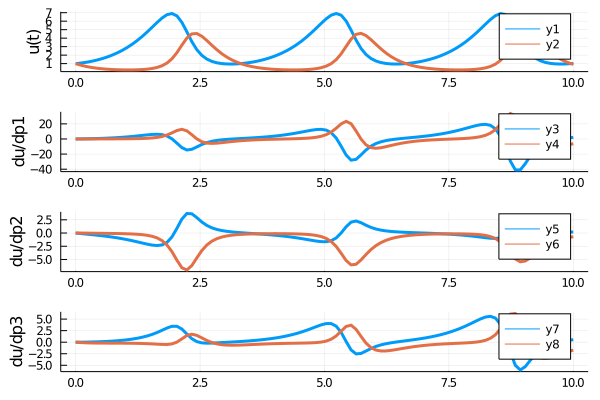

In [46]:
plot(layout=(4, 1))
plot!(sol.t, x', lw=3, yaxis=("u(t)"), subplot=1)
plot!(sol.t, dp[1]', lw=3, yaxis=("du/dp1"), subplot=2)
plot!(sol.t, dp[2]', lw=3, yaxis=("du/dp2"), subplot=3)
plot!(sol.t, dp[3]', lw=3, yaxis=("du/dp3"), subplot=4)